### 9-20: Parametric Tests and Multiple Comparisons
Isabella Turco  
QNC 

In this exercise we will run through an example of correcting for multiple comparisons with both the Benjamini-Hochberg procedure and the more conservative Bonferroni correction.

First, simulate multiple (say, 1000) t-tests comparing two samples with equal means and standard deviations, and save the p-values. Obviously, at p<0.05 we expect that ~5% of the simulations to yield a "statistically significant" result (of rejecting the NULL hypothesis that the samples come from distributions with equal means).

Second, once you have the simulated p-values, apply both methods to address the multiple comparisons problem.

Third, set the sample 1 and sample 2 means to be 1 and 2 respectively, and re-run the exercise. What do you notice? What if you make the difference between means even greater?

In [158]:
import numpy as np 
import scipy.stats as st
import matplotlib.pyplot as plt

In [212]:
n = 1_000
alpha = 0.05
bonferroni_alpha = alpha / n
false_discovery_rate = alpha

In [209]:
def simulate_multiple_t_tests(s1_mean, s2_mean, sd):
    p_values = []

    for experiment in range(n): 

        sample_1 = np.random.normal(s1_mean, sd, n)
        sample_2 = np.random.normal(s2_mean, sd, n)

        D = sample_2 - sample_1

        # manually calculate t statistic 
        t_D = D.mean()*np.sqrt(n)/D.std(ddof=1)

        # The p-value is the probabilty of obtaining the t-statistic under the null hypothesis; that is, 1 minus the cdf of the t-distribution, given n-1 degrees of freedom (multiplied by two because we are looking at two symmetric tails)
        # manually calculate p value
        p_D = 2.*(1-st.t.cdf(t_D, n-1))

        # Compare to what we get from ttest
        # calculate t and p statistics using stats scipy t-test function 
        tstat, pval = st.ttest_1samp(D, 0)
        p_values.append(pval)

    original_significant_tests = [p_val < alpha for p_val in p_values]
    print(f"Number of Significant Tests = {sum(original_significant_tests)}")

    plt.hist(p_values, bins = 30)
    plt.title(f"Occurrence of P Values in {n} T-Tests")
    plt.xlabel("P Value")
    plt.ylabel("Count")
    plt.show()

    return p_values

In [277]:
def benjamini_hochberg_procedure(p_values): 
    # rank p values in ascending order 
    ranked_indices = (np.array(p_values)).argsort()
    ranked_p_values = (np.array(p_values))[ranked_indices]
    # for each p value, calculate critical value 
    critical_values = [((index + 1) / n) * false_discovery_rate for index in range(0,len(ranked_p_values))]
    # find the largest value in rank_order_p_values that is smaller than its associated critcal value --> set that p value as the new experimental p value 
    p_vs_critical = ranked_p_values < np.array(critical_values)
    # print(type(p_vs_critical))
    if np.any(p_vs_critical):
        index_critical_value = np.max(np.where(p_vs_critical))
        benjamini_hochberg_alpha = ranked_p_values[index_critical_value]
        benjamini_hochberg_significant_tests = [p_val < benjamini_hochberg_alpha for p_val in p_values]
    else: 
        benjamini_hochberg_significant_tests = 0 

    return benjamini_hochberg_significant_tests

### Simulation 1: equal sample means and standard deviation

Number of Significant Tests = 56


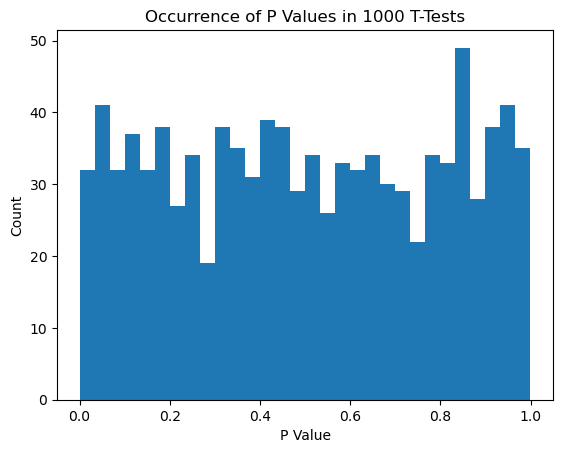

After Bonferroni Correction, Number of Significant Tests = 1
After Benjamini-Hochberhg Procedure, Number of Significant Tests = 0


In [278]:
simulation_1_p_values = simulate_multiple_t_tests(s1_mean=0, s2_mean=0, sd=2)

# test for signifance against Bonferroni Correction alpha 
bonferroni_significant_tests_1 = [p_val < bonferroni_alpha for p_val in simulation_1_p_values]
print(f"After Bonferroni Correction, Number of Significant Tests = {sum(bonferroni_significant_tests_1)}")

benjamini_hochberg_significant_tests_1 = benjamini_hochberg_procedure(simulation_1_p_values)
print(f"After Benjamini-Hochberhg Procedure, Number of Significant Tests = {sum(benjamini_hochberg_significant_tests_1)}")

### Simulation 2: different sample means

Number of Significant Tests = 1000


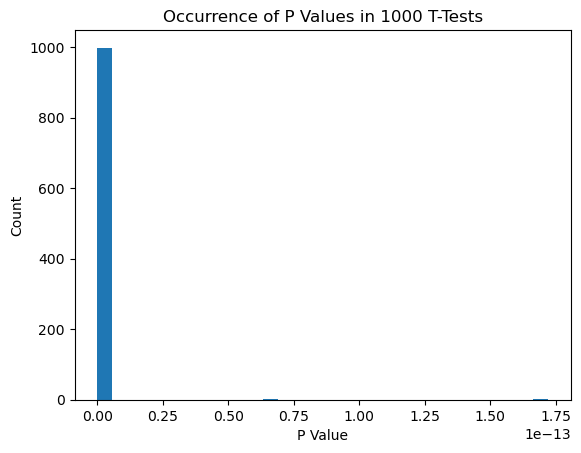

After Bonferroni Correction, Number of Significant Tests = 1000
After Benjamini-Hochberhg Procedure, Number of Significant Tests = 999


In [280]:
simulation_2_p_values = simulate_multiple_t_tests(s1_mean=1, s2_mean=2, sd=2)

bonferroni_significant_tests_2 = [p_val < bonferroni_alpha for p_val in simulation_2_p_values]
print(f"After Bonferroni Correction, Number of Significant Tests = {sum(bonferroni_significant_tests_2)}")

benjamini_hochberg_significant_tests_2 = benjamini_hochberg_procedure(simulation_2_p_values)
print(f"After Benjamini-Hochberhg Procedure, Number of Significant Tests = {sum(benjamini_hochberg_significant_tests_2)}")

### Simulation 3: very different sample means

Number of Significant Tests = 1000


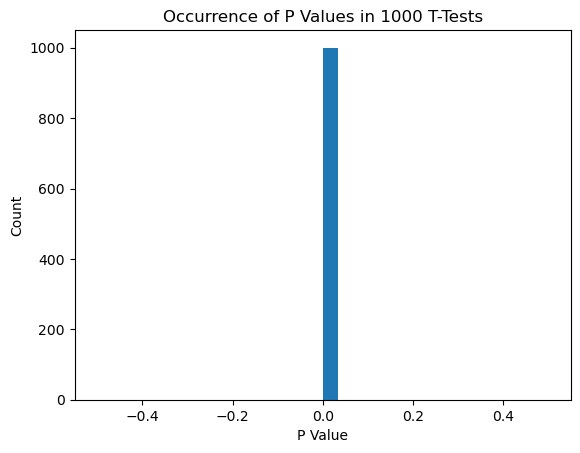

After Bonferroni Correction, Number of Significant Tests = 1000
After Benjamini-Hochberhg Procedure, Number of Significant Tests = 0


In [281]:
simulation_3_p_values = simulate_multiple_t_tests(s1_mean=1, s2_mean=10, sd=2)

bonferroni_significant_tests_3 = [p_val < bonferroni_alpha for p_val in simulation_3_p_values]
print(f"After Bonferroni Correction, Number of Significant Tests = {sum(bonferroni_significant_tests_2)}")

benjamini_hochberg_significant_tests_3 = benjamini_hochberg_procedure(simulation_3_p_values)
print(f"After Benjamini-Hochberhg Procedure, Number of Significant Tests = {sum(benjamini_hochberg_significant_tests_3)}")